In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
match_df = pd.read_csv("international_matches.csv")
match_df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

In [4]:
match_df.describe()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
count,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,8379.000000,8095.000000,7787.000000,8510.000000,8162.000000,7564.000000,8312.000000,7979.000000
mean,77.854688,80.797375,323.401488,315.453576,1.609214,1.068266,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143
std,52.355225,53.232902,500.825725,490.944273,1.630127,1.263944,8.212242,8.225919,6.003114,6.268416,6.053110,5.937425,6.201906,6.124573
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,47.000000,47.000000,52.800000,53.300000,54.200000,52.800000,53.300000,54.200000
25%,33.000000,36.000000,0.000000,0.000000,0.000000,0.000000,70.000000,69.000000,71.000000,71.700000,72.500000,70.500000,71.300000,71.800000
50%,71.000000,73.000000,0.000000,0.000000,1.000000,1.000000,75.000000,74.000000,75.200000,75.700000,76.200000,74.500000,75.300000,75.500000
75%,115.000000,119.000000,547.000000,523.000000,2.000000,2.000000,81.000000,80.000000,78.800000,80.000000,79.500000,78.200000,79.700000,79.000000
max,211.000000,211.000000,2164.000000,2164.000000,31.000000,21.000000,97.000000,97.000000,91.800000,93.000000,93.200000,91.800000,93.000000,93.200000


In [5]:
match_df.isna().sum()

date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       15542
away_team_goalkeeper_score       15826
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
dtype: int64

In [6]:
match_df.keys()

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

In [7]:
match_df.values

array([['1993-08-08', 'Bolivia', 'Uruguay', ..., nan, nan, nan],
       ['1993-08-08', 'Brazil', 'Mexico', ..., nan, nan, nan],
       ['1993-08-08', 'Ecuador', 'Venezuela', ..., nan, nan, nan],
       ...,
       ['2022-06-14', 'Chile', 'Ghana', ..., 75.5, 76.0, 78.2],
       ['2022-06-14', 'Japan', 'Tunisia', ..., 70.8, 72.3, 74.0],
       ['2022-06-14', 'Korea Republic', 'Egypt', ..., nan, 79.3, 70.8]],
      dtype=object)

In [8]:
match_df.shape

(23921, 25)

In [9]:
print('\nTop 10 team ranking:\n' )
match_df[:10]


Top 10 team ranking:



,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1993-08-08,Peru,Colombia,South America,South America,70,19,0,0,0,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1993-08-08,Zimbabwe,Eswatini,Africa,Africa,50,102,0,0,2,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1993-08-09,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,4,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1993-08-11,Faroe Islands,Norway,Europe,Europe,111,9,0,0,0,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1993-08-11,Sweden,Switzerland,Europe,Europe,4,3,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
print("Dimensions: ",match_df.shape, "\n")

Dimensions:  (23921, 25) 



In [11]:
print(match_df.groupby('home_team_result').size())

home_team_result
Draw     5389
Lose     6771
Win     11761
dtype: int64


In [12]:
print("Draw :", match_df['home_team_result'].value_counts()[2])
print("Win :", match_df['home_team_result'].value_counts()[0])
print("Lose :", match_df['home_team_result'].value_counts()[1])

Draw : 5389
Win : 11761
Lose : 6771


In [13]:
X = match_df.iloc[:, 13:]
y = match_df.iloc[:, 0]

In [14]:
# find and remove correlated features
def correlation(data, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

# Setting threshold value if greater than 0.7 means multicollinearity between independent features is high and we have to remove that features:
correlation(match_df, 0.7)

C:\Users\User\AppData\Local\Temp\ipykernel_15664\1929195168.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


{'away_team_mean_midfield_score',
 'away_team_mean_offense_score',
 'away_team_total_fifa_points',
 'home_team_mean_defense_score',
 'home_team_mean_midfield_score',
 'home_team_mean_offense_score'}

In [15]:
match_df = match_df.replace({"IR Iran": "Iran", "Korea Republic" : "South Korea"})

In [16]:
match_df['rank_difference'] = match_df['home_team_fifa_rank'] - match_df['away_team_fifa_rank']
match_df['average_rank'] = (match_df['home_team_fifa_rank'] + match_df['away_team_fifa_rank'])/2
match_df['point_difference'] = match_df['home_team_total_fifa_points'] - match_df['away_team_total_fifa_points']
match_df['is_stake'] = match_df['tournament'] != 'Friendly'
match_df['is_worldcup'] = 'FIFA World Cup' in match_df['tournament']

match_df['score_difference'] = match_df['home_team_score'] - match_df['away_team_score'] # Note that this feature is not used in training
match_df['is_won'] = match_df['score_difference'] > 0 # Take draw as lost

In [17]:
X, y = match_df.loc[:,['average_rank', 'rank_difference', 'point_difference', 'is_stake', 'is_worldcup']], match_df['is_won']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
svc = SVC()
svc.fit(X_train, y_train)
svm_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_test, y_test) * 100, 2)
acc_svc

68.17

In [19]:
wc_2022 = ['Qatar','Ecuador','Senegal','Netherland','England','Iran','USA','Wales','Argentina','Saudi Arabia','Mexico','Poland','France','Australia','Denmark','Tunisia','Spain','Costaa Rica','Germany','Japan','Belgium','Canada','Morocco','Croatia','Brazil','Serbia','Switzerland','Cameroon','Portugal','Ghana','Uruguay','South Korea']

In [20]:
goals_conceded_home, goals_scored_home, goals_conceded_away, goals_scored_away = [], [], [], []
total_goals_scored, total_goals_conceded = [], []
for team in wc_2022:
    gch = match_df[match_df['home_team']==team]['away_team_score'].sum()
    gsh = match_df[match_df['home_team']==team]['home_team_score'].sum()
    gca = match_df[match_df['away_team']==team]['home_team_score'].sum()
    gsa = match_df[match_df['away_team']==team]['away_team_score'].sum()
    
    
    tgc = np.add(gch,gca)
    tgs = np.add(gsh,gsa)
    
    goals_conceded_home.append(gch)
    goals_scored_home.append(gsh)
    goals_conceded_away.append(gca)
    goals_scored_away.append(gsa)
    
    total_goals_scored.append(tgs)
    total_goals_conceded.append(tgc)
    
goals = pd.DataFrame({'Team':wc_2022,'Scored goals home':goals_scored_home,'Scored goals away':goals_scored_away,'Conceded goals home':goals_conceded_home,'Conceded goals away':goals_conceded_away ,'Total scored goals':total_goals_scored,'Total conceded goals':total_goals_conceded})

goals['Goal difference'] = goals['Total scored goals'] - goals['Total conceded goals']
goals['Goal ratio'] = goals['Total scored goals']/ goals['Total conceded goals']

goals = goals.sort_values('Goal difference', ascending = False).reset_index(drop = True)
goals.index += 1
goals

,Team,Scored goals home,Scored goals away,Conceded goals home,Conceded goals away,Total scored goals,Total conceded goals,Goal difference,Goal ratio
1,Brazil,558,396,141,159,954,300,654,3.180000
2,Spain,469,312,107,141,781,248,533,3.149194
3,Germany,544,331,220,171,875,391,484,2.237852
4,Iran,425,288,115,165,713,280,433,2.546429
5,France,447,223,154,112,670,266,404,2.518797
6,Portugal,424,244,124,144,668,268,400,2.492537
7,England,384,246,132,119,630,251,379,2.509960
8,Japan,533,243,273,153,776,426,350,1.821596
9,Mexico,572,286,272,247,858,519,339,1.653179
10,Australia,435,194,127,164,629,291,338,2.161512


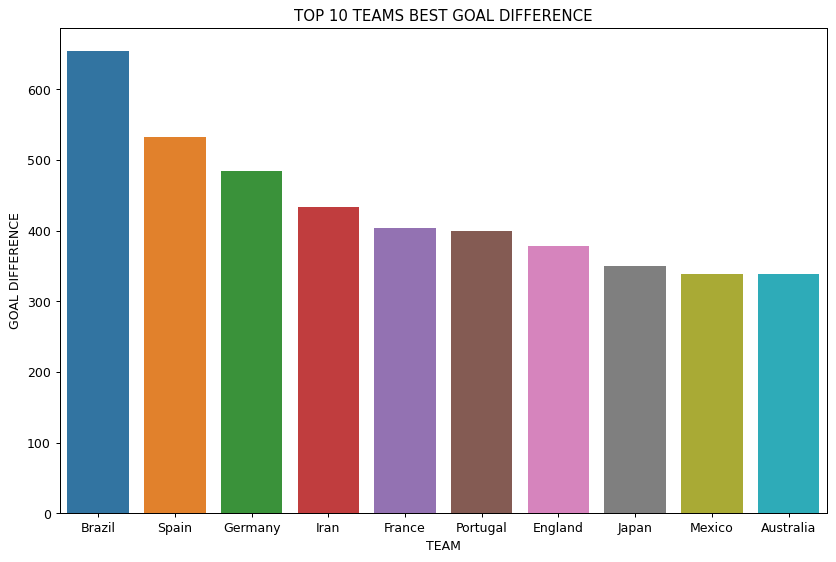

In [21]:
plt.figure(figsize=(11,7), dpi=90)
ax = sns.barplot(data=goals[:10], x='Team', y='Goal difference')
plt.xlabel('TEAM')
plt.ylabel('GOAL DIFFERENCE')
plt.title('TOP 10 TEAMS BEST GOAL DIFFERENCE');

In [22]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines'],
    'Score': [acc_svc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,68.17


In [23]:
import pickle
Pkl_Filename = "SVM.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(SVC, file)

In [24]:
#load back
with open(Pkl_Filename, 'rb') as file:  
    Pickled_SVM_Model = pickle.load(file)
Pickled_SVM_Model

sklearn.svm._classes.SVC